<a href="https://colab.research.google.com/github/ruthika11/ipython-notebook-examples/blob/master/Open_crime_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questions**
**1**.Top 10 Type by # events.   
Output:
type, num_events, rank

**2**.Top 10 Ethnics by # events. Use column “Officer-defined ethnicity”     
Output:
type, office_num_events, office_ethnic_rank

**3**.Top 10 Ethnics by # events. Use column “Self-defined ethnicity”   
Output:
type, self_num_events, self_ethnic_rank

**4**.Merge 2 and 3 above on type.   
Output:
type, office_num_events, office_ethnic_rank, self_num_events, self_ethnic_rank

**5**.Top 10 Type by Gender = Male.   
Output:
type, num_events_men, rank_men

**6**.Top 10 Type by Gender = Female.   
Output:
type, num_events_men, rank_women

**7**.Group bar chart plot (vertical) with output from 5 and 6.   
[1][2]  
Bar 1 -> Male   
Bar 2 -> Female

**8**.For Gender = Male, # events by “Age range”     
Output:
type, age_range_male, num_events_male, rank_male

**9**.For Gender = Female, # events by “Age range”   
Output:
type, age_range_female, num_events_female, rank_female

**10** .  Merge 8 and 9 on column “type”  
Output:
type, age_range_male, num_events_male, rank_male, age_range_female, num_events_female, rank_female



In [ ]:
import csv
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import datetime
from dateutil import parser
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive/")
import glob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivy = "all"

In [ ]:
!ls - ltr /content/drive/MyDrive/

In [ ]:
!ls - ltr /content/drive/MyDrive/2019-07/

In [4]:
def pretty_print(df,n):
    print(tabulate(df.head(n), headers="keys", tablefmt="psql"))

In [ ]:
path = r"/content/drive/MyDrive/2019-07/"
all_files = glob.glob(path +"/*.csv")
lst = []
for filename in all_files:
  df = pd.read_csv(filename, index_col= None ,header =0)
  lst.append(df)

df_all = pd.concat(lst, axis = 0, ignore_index = True)
df_stat = df_all.describe(include= "all")
pretty_print(df_stat,10)

In [ ]:
df1 = pd.read_csv(r"/content/drive/MyDrive/2019-07/2019-07-durham-stop-and-search.csv")
print(df1.head(2))

# 1.Top 10 Type by # events.
Output: type, num_events, rank

In [7]:
top_10_type = df1.groupby("Type").size().to_frame("num_events").reset_index()
top_10_type = top_10_type.sort_values(by = "num_events", ascending= False)
top_10_type["rank"] = top_10_type["num_events"].rank(ascending = False)
pretty_print(top_10_type,10)

+----+---------------------------+--------------+--------+
|    | Type                      |   num_events |   rank |
|----+---------------------------+--------------+--------|
|  1 | Person search             |          146 |      1 |
|  0 | Person and Vehicle search |           69 |      2 |
|  2 | Vehicle search            |            5 |      3 |
+----+---------------------------+--------------+--------+


# 2.Top 10 Ethnics by # events. Use column “Officer-defined ethnicity”
Output: type, office_num_events, office_ethnic_rank

In [11]:
top_10_ethnics_officer = df1.groupby(["Type","Officer-defined ethnicity"]).size().to_frame("office_num_events").reset_index()
top_10_ethnics_officer = top_10_ethnics_officer.sort_values(by = "office_num_events", ascending= False)
top_10_ethnics_officer[" office_ethnic_rank"] = top_10_ethnics_officer["office_num_events"].rank(ascending = False)
pretty_print(top_10_ethnics_officer,10)

+----+---------------------------+-----------------------------+---------------------+-----------------------+
|    | Type                      | Officer-defined ethnicity   |   office_num_events |    office_ethnic_rank |
|----+---------------------------+-----------------------------+---------------------+-----------------------|
|  5 | Person search             | White                       |                 136 |                     1 |
|  1 | Person and Vehicle search | White                       |                  63 |                     2 |
|  0 | Person and Vehicle search | Asian                       |                   3 |                     4 |
|  2 | Person search             | Asian                       |                   3 |                     4 |
|  4 | Person search             | Other                       |                   3 |                     4 |
|  3 | Person search             | Black                       |                   2 |                     6 |
+

# 3.Top 10 Ethnics by # events. Use column “Self-defined ethnicity”
Output: type, self_num_events, self_ethnic_rank

In [15]:
top_10_ethnics_Self = df1.groupby(["Type","Self-defined ethnicity"]).size().to_frame("self_num_events").reset_index()
top_10_ethnics_Self = top_10_ethnics_Self.sort_values(by = "self_num_events", ascending= False)
top_10_ethnics_Self["self_ethnic_rank"] = top_10_ethnics_Self["self_num_events"].rank(ascending = False)
pretty_print(top_10_ethnics_Self,10)

+----+---------------------------+---------------------------------------------------------------------------+-------------------+--------------------+
|    | Type                      | Self-defined ethnicity                                                    |   self_num_events |   self_ethnic_rank |
|----+---------------------------+---------------------------------------------------------------------------+-------------------+--------------------|
|  9 | Person search             | White - English/Welsh/Scottish/Northern Irish/British                     |               129 |                  1 |
|  1 | Person and Vehicle search | White - English/Welsh/Scottish/Northern Irish/British                     |                66 |                  2 |
|  7 | Person search             | Other ethnic group - Not stated                                           |                 7 |                  3 |
| 10 | Vehicle search            | Other ethnic group - Not stated                      

# 4.Merge 2 and 3 above on type.
Output: type, office_num_events, office_ethnic_rank, self_num_events, self_ethnic_rank

In [22]:
merge1 = pd.merge(top_10_ethnics_officer,top_10_ethnics_Self, on = ["Type"] , how = "inner")
pretty_print(merge1,20)

+----+---------------+-----------------------------+---------------------+-----------------------+--------------------------------------------------------------------------------------+-------------------+--------------------+
|    | Type          | Officer-defined ethnicity   |   office_num_events |    office_ethnic_rank | Self-defined ethnicity                                                               |   self_num_events |   self_ethnic_rank |
|----+---------------+-----------------------------+---------------------+-----------------------+--------------------------------------------------------------------------------------+-------------------+--------------------|
|  0 | Person search | White                       |                 136 |                     1 | White - English/Welsh/Scottish/Northern Irish/British                                |               129 |                  1 |
|  1 | Person search | White                       |                 136 |                  

# 5.Top 10 Type by Gender = Male.
Output: type, num_events_men, rank_men

In [34]:
top_10_male = df1.where(df1["Gender"] == "Male").groupby(["Type"]).size().to_frame("num_events_men").reset_index()
top_10_male = top_10_male.sort_values(by = "num_events_men", ascending= False)
top_10_male["rank_men"] = top_10_male["num_events_men"].rank(ascending = False)
pretty_print(top_10_male,10)

+----+---------------------------+------------------+------------+
|    | Type                      |   num_events_men |   rank_men |
|----+---------------------------+------------------+------------|
|  1 | Person search             |              116 |          1 |
|  0 | Person and Vehicle search |               47 |          2 |
+----+---------------------------+------------------+------------+


# 6.Top 10 Type by Gender = Female.
Output: type, num_events_men, rank_women

In [35]:
top_10_female = df1.where(df1["Gender"] == "Female").groupby(["Type"]).size().to_frame("num_events_women").reset_index()
top_10_female = top_10_female.sort_values(by = "num_events_women", ascending= False)
top_10_female["rank_women"] = top_10_female["num_events_women"].rank(ascending = False)
pretty_print(top_10_female,10)

+----+---------------------------+--------------------+--------------+
|    | Type                      |   num_events_women |   rank_women |
|----+---------------------------+--------------------+--------------|
|  0 | Person and Vehicle search |                  9 |            1 |
|  1 | Person search             |                  8 |            2 |
+----+---------------------------+--------------------+--------------+


# 7.Group bar chart plot (vertical) with output from 5 and 6.
[1][2]    
Bar 1 -> Male   
Bar 2 -> Female

In [ ]:
male_female = pd.merge(top_10_male,top_10_female)

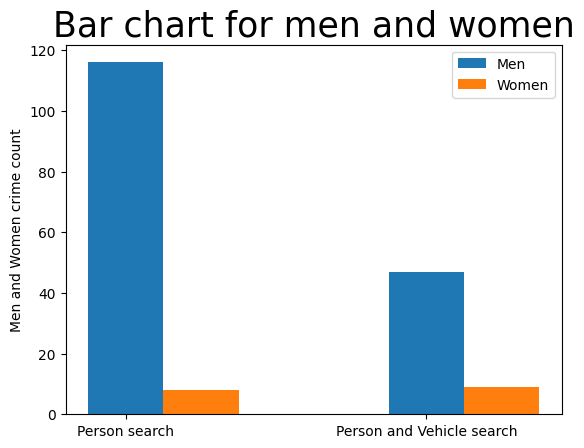

In [53]:
n = 2
men = list(male_female["num_events_men"])[0:n]
women = list(male_female["num_events_women"])[0:n]
lst = list(male_female["Type"])[0:n]
x = np.arange(n)
width = 0.25

plt.title("Bar chart for men and women",size = 25)
plt.ylabel("Men and Women crime count")
plt.bar(x,men,width,label = "Men")
plt.bar(x + width,women,width,label = "Women")
0
plt.xticks(x,lst, rotation = 0)
plt.legend(loc = "best")
plt.show()

# 8.For Gender = Male, # events by “Age range”
Output: type, age_range_male, num_events_male, rank_male

In [47]:
male_age = df1.where(df1["Gender"] == "Male").groupby(["Type","Age range"]).size().to_frame("age_range_male").reset_index()
male_age = male_age.sort_values(by = "age_range_male", ascending= False)
male_age["rank_male"] = male_age["age_range_male"].rank(ascending = False)
male_age.columns = [ "type", "age_range_male","num_events_male","rank_male"]
pretty_print(male_age,10)

+----+---------------------------+------------------+-------------------+-------------+
|    | type                      | age_range_male   |   num_events_male |   rank_male |
|----+---------------------------+------------------+-------------------+-------------|
|  7 | Person search             | over 34          |                31 |           1 |
|  5 | Person search             | 18-24            |                30 |           2 |
|  4 | Person search             | 10-17            |                28 |           3 |
|  6 | Person search             | 25-34            |                27 |           4 |
|  1 | Person and Vehicle search | 18-24            |                19 |           5 |
|  2 | Person and Vehicle search | 25-34            |                13 |           6 |
|  3 | Person and Vehicle search | over 34          |                12 |           7 |
|  0 | Person and Vehicle search | 10-17            |                 3 |           8 |
+----+--------------------------

# 9.For Gender = Female, # events by “Age range”
Output: type, age_range_female, num_events_female, rank_female

In [44]:
female_age = df1.where(df1["Gender"] == "Female").groupby(["Type","Age range"]).size().to_frame("age_range_female").reset_index()
female_age = female_age.sort_values(by = "age_range_female", ascending= False)
female_age["rank_female"] = female_age["age_range_female"].rank(ascending = False)
female_age.columns = [ "type", "age_range_female","num_events_female","rank_female"]
pretty_print(female_age,10)

+----+---------------------------+--------------------+---------------------+---------------+
|    | type                      | age_range_female   |   num_events_female |   rank_female |
|----+---------------------------+--------------------+---------------------+---------------|
|  2 | Person and Vehicle search | 25-34              |                   7 |           1   |
|  5 | Person search             | over 34            |                   4 |           2   |
|  3 | Person search             | 10-17              |                   2 |           3.5 |
|  4 | Person search             | 18-24              |                   2 |           3.5 |
|  0 | Person and Vehicle search | 10-17              |                   1 |           5.5 |
|  1 | Person and Vehicle search | 18-24              |                   1 |           5.5 |
+----+---------------------------+--------------------+---------------------+---------------+


# 10 . Merge 8 and 9 on column “type”
Output: type, age_range_male, num_events_male, rank_male, age_range_female, num_events_female, rank_female

In [49]:
merge2 = pd.merge(male_age,female_age)
pretty_print(merge2,30)

+----+---------------------------+------------------+-------------------+-------------+--------------------+---------------------+---------------+
|    | type                      | age_range_male   |   num_events_male |   rank_male | age_range_female   |   num_events_female |   rank_female |
|----+---------------------------+------------------+-------------------+-------------+--------------------+---------------------+---------------|
|  0 | Person search             | over 34          |                31 |           1 | over 34            |                   4 |           2   |
|  1 | Person search             | over 34          |                31 |           1 | 10-17              |                   2 |           3.5 |
|  2 | Person search             | over 34          |                31 |           1 | 18-24              |                   2 |           3.5 |
|  3 | Person search             | 18-24            |                30 |           2 | over 34            |          